In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('train.csv')
df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['y'].describe()

count        10834
unique           7
top       DERMASON
freq          2837
Name: y, dtype: object

In [7]:
df.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [8]:
le = preprocessing.LabelEncoder()
le.fit(['DERMASON', 'SIRA','SEKER', 'HOROZ','CALI','BARBUNYA','BOMBAY'])
df['y']=le.transform(df['y'])

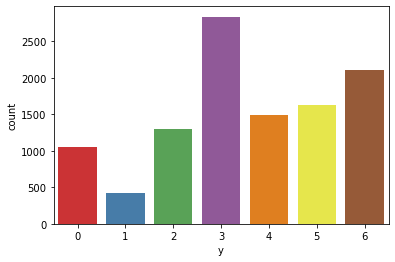

In [9]:
sns.countplot(x='y', data=df, palette='Set1')
plt.show()

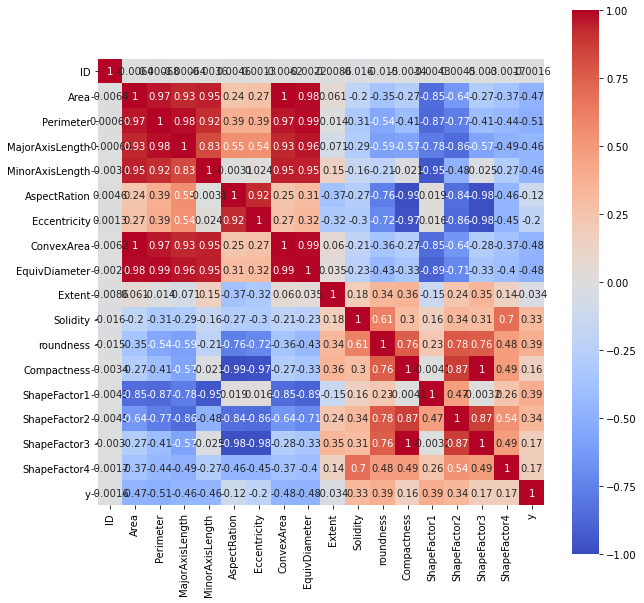

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

In [11]:
def help_plot(df,col_name,label):
    fig, ax = plt.subplots(1,4,figsize= (30,5))
    sns.boxplot(data = df,x=label,y=col_name,ax=ax[0])
    sns.kdeplot(df[col_name],ax=ax[1])
    sns.histplot(df[col_name],ax=ax[2])
    sns.histplot(data=df,x=col_name,hue=label,ax=ax[3]);

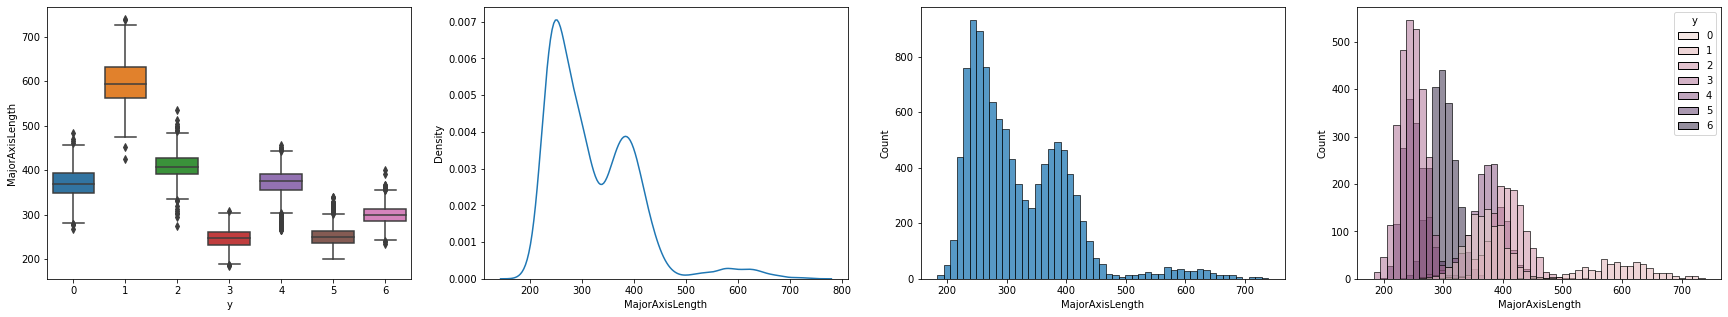

In [12]:
help_plot(df,'MajorAxisLength','y')

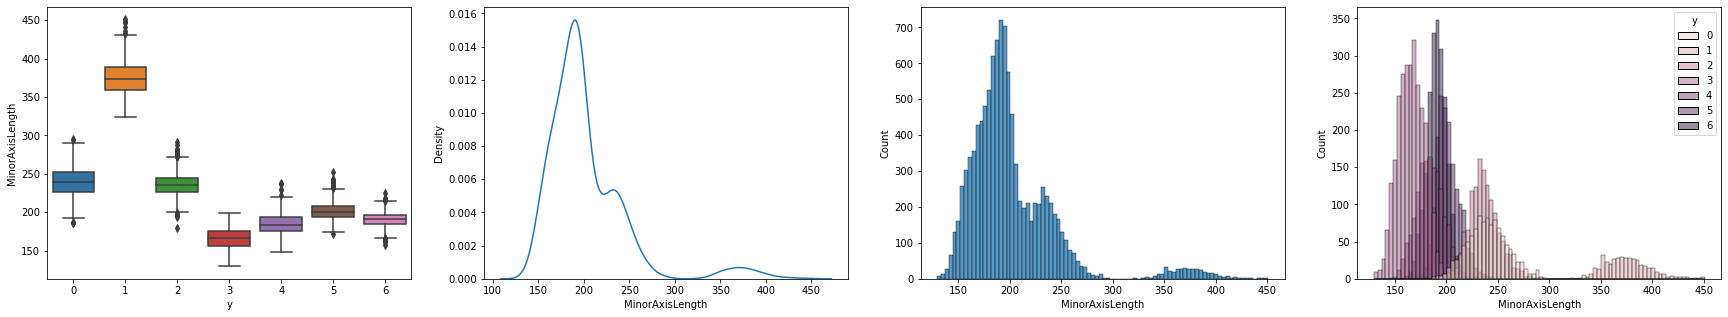

In [13]:
help_plot(df,'MinorAxisLength','y')

<AxesSubplot:xlabel='MinorAxisLength', ylabel='MajorAxisLength'>

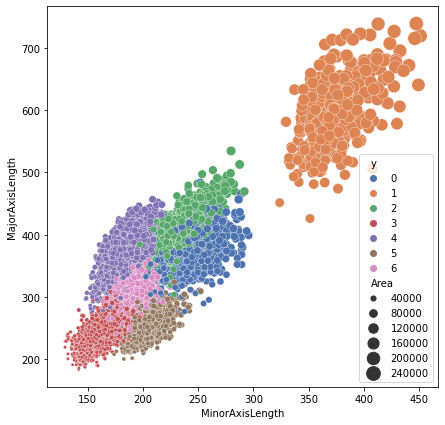

In [14]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(data=df,x='MinorAxisLength',y='MajorAxisLength',hue='y',size='Area',sizes = (10,200),alpha=1, palette="deep")

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

In [16]:
Y = df.y
X=df.drop(['ID','y'],axis = 1)
columns = X.columns

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [18]:
#value=45
transformer = RobustScaler().fit(x_train)
x_train=transformer.transform(x_train)
x_test=transformer.transform(x_test)
power=PowerTransformer(method='yeo-johnson').fit(x_train)
x_train = power.transform(x_train)
x_test = power.transform(x_test)


In [19]:
# fit model no training data
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
model =XGBClassifier(learning_rate=0.1,max_depth=5,colsample_bytree=0.7,n_estimators=100,
                    eval_metric='merror',
                   random_state=42,alpha =10,use_label_encoder=False) 


In [20]:
from sklearn.metrics import f1_score
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(f1_score(y_train,y_pred_train,average='micro'))
print(f1_score(y_test,y_pred,average='micro'))

0.9427692307692308
0.9354243542435424


In [21]:
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0, 117],
       [  1,  38],
       [  2, 119],
       [  3, 286],
       [  4, 132],
       [  5, 168],
       [  6, 224]], dtype=int64)

In [22]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0, 119],
       [  1,  38],
       [  2, 122],
       [  3, 282],
       [  4, 138],
       [  5, 163],
       [  6, 222]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       119
           1       1.00      1.00      1.00        38
           2       0.92      0.90      0.91       122
           3       0.92      0.93      0.93       282
           4       0.96      0.92      0.94       138
           5       0.96      0.99      0.98       163
           6       0.90      0.91      0.91       222

    accuracy                           0.94      1084
   macro avg       0.95      0.94      0.94      1084
weighted avg       0.94      0.94      0.94      1084



In [24]:
df1=pd.read_csv('test.csv')
df1.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [25]:
X_t=df1.drop(['ID'],axis =1)
X_t= transformer.transform(X_t)
X_t= power.transform(X_t)

In [27]:
y_test_predicted = model.predict(X_t)
df1['y'] = y_test_predicted
df1['y']=le.inverse_transform(df1['y'])
df1.tail()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504,CALI
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923,SEKER
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748,HOROZ
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263,DERMASON
2708,13542,49175,828.597,310.354804,202.329323,1.533909,0.758280,49668,250.223010,0.798166,0.990074,0.900052,0.806248,0.006311,0.001645,0.650036,0.997096,SIRA


In [28]:
df1[['ID', 'y']].to_csv('submission.csv', index=False)